# Written by Federica B. Bianco @fedhere
# Implemented and edited by Baiyue Cao (BC1561) @SPTKL

- ### Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 
- ### Choose the significance threshold
- ### Clearly state they Null and Alternate hypothesis
- ### Wrangle the data so that it is ready for your analysis.

In [4]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
from urllib.request import urlopen
import matplotlib.pylab as plt
import io

%pylab inline
data_url = urlopen('https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip')
df = pd.read_csv(io.BytesIO(data_url.read()), compression='zip', sep=',')

Populating the interactive namespace from numpy and matplotlib


C:\Users\caoba\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1


# IDEA:
### Tourists (notated as "customers" in the data set) pay for 24 hour pass or 3 hour pass use citibikes for longer durations than annual subscribers because tourists want to maximize their short term pass values. 

# NULL HYPOTHESIS:
## The ratio of customers biking for longer than or equal to 700 seconds of duration over customers biking for less than 700s of duration is larger or equal to the ratio of subscribers biking biking for longer than or equal to 700 seconds of duration over customers biking for less than 700s of duration

# _$H_0$_ : $\frac{C_{\mathrm{>= 700s}}}{C_{\mathrm{<700s}}} >= \frac{S_{\mathrm{>=700}}}{S_{\mathrm{<700s}}}$
# _$H_1$_ : $\frac{C_{\mathrm{>= 700s}}}{C_{\mathrm{<700s}}} < \frac{S_{\mathrm{>=700}}}{S_{\mathrm{<700s}}}$


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

## I am starting with a single month of data:  reading data from citibike csv file from July 2017

As shown above, I read the data set into a dataframe called "df", and I will collect the trip duration column and the usertype column to conduct further analysis

In [6]:
df = df[['tripduration', 'usertype']]
over_700s = df.tripduration >= 700
df['over_700s'] = over_700s.astype(int)
df.head(5)

,tripduration,usertype,over_700s
0,340,Subscriber,0
1,439,Subscriber,0
2,186,Subscriber,0
3,442,Subscriber,0
4,170,Subscriber,0


In [7]:
df.groupby(['over_700s','usertype']).size().unstack()

usertype,Customer,Subscriber
over_700s,,
0,685,24919
1,1943,6026


## Add visualization here

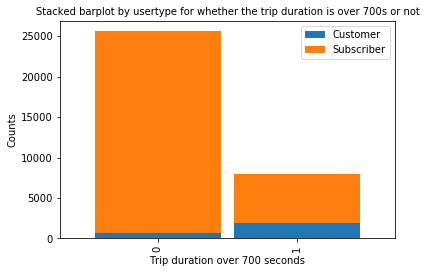

In [8]:
ax1 = pl.subplot()
byusertype = df.groupby(['over_700s','usertype']).size().unstack()
byusertype.columns = ['Customer', 'Subscriber']
byusertype.plot(kind = 'bar',stacked = True, ax = ax1, width = 0.9)
ax1.set_xlabel('Trip duration over 700 seconds', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)
ax1.set_title('Stacked barplot by usertype for whether the trip duration is over 700s or not', fontsize=10)

In [9]:
C_o700s = byusertype['Customer'][1]/sum(byusertype['Customer']) #fraction of Customers riding over 700s
C_l700s = byusertype['Customer'][0]/sum(byusertype['Customer']) #fraction of Customers riding less than 700s

S_o700s = byusertype['Subscriber'][1]/sum(byusertype['Subscriber']) #fraction of Subscribers riding over 700s
S_l700s = byusertype['Subscriber'][0]/sum(byusertype['Subscriber']) #fraction of Subscribers riding less than 700s

print('fraction of Customers riding over 700s is', C_l700s)
print('fraction of Customers riding less than 700s is', C_o700s)
print('fraction of Subscribers riding over 700s is',S_l700s)
print('fraction of Subscribers riding less than 700s is',S_o700s)

C_o700s >= S_o700s # need to check the significance level of the null hypothesis

fraction of Customers riding over 700s is 0.260654490107
fraction of Customers riding less than 700s is 0.739345509893
fraction of Subscribers riding over 700s is 0.805267409921
fraction of Subscribers riding less than 700s is 0.194732590079


True